In [163]:
# import libraries
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aldol07/socioeconomic-factors-and-income-dataset")

print("Path to dataset files:", path)


Path to dataset files: /Users/jackgedge/.cache/kagglehub/datasets/aldol07/socioeconomic-factors-and-income-dataset/versions/1


In [164]:
# Import other libraries
import pandas as pd
import seaborn as sns
import os
from pathlib import Path
from matplotlib import pyplot as plt

In [165]:
# Read files in path
csv_files = [str(file) for file in Path(path).rglob('*.csv')]
df = pd.read_csv(csv_files[0])

In [166]:
df.shape

(2000, 8)

In [167]:
df.duplicated().sum()

np.int64(0)

In [168]:
df.isna().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [169]:
# Display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               2000 non-null   int64 
 1   Sex              2000 non-null   int64 
 2   Marital status   2000 non-null   object
 3   Age              2000 non-null   int64 
 4   Education        2000 non-null   object
 5   Income           2000 non-null   int64 
 6   Occupation       2000 non-null   object
 7   Settlement size  2000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 125.1+ KB


In [170]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,single,67,university,124670,skilled employee / official,2
1,100000002,1,non-single (divorced / separated / married / w...,22,high school,150773,skilled employee / official,2
2,100000003,0,single,49,high school,89210,unemployed / unskilled,0
3,100000004,0,single,45,high school,171565,skilled employee / official,1
4,100000005,0,single,53,high school,149031,skilled employee / official,1


In [171]:
# check IDs are unique
df['ID'].nunique() == len(df['ID'])

True

In [172]:
# Show unique values in Sex column
df['Sex'].unique()

array([0, 1])

In [173]:
# Cast Sex to type string
df['Sex'] = df['Sex'].astype(str)

# Create gender map
gender_map = {
    '0': 'Female',
    '1': 'Male'
}

# Map gender to Sex column
df['Sex'] = df['Sex'].map(gender_map)

df['Sex'] = df['Sex'].astype('category') # Set as categorical variable

df['Sex'].value_counts()

Sex
Female    1086
Male       914
Name: count, dtype: int64

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_12926/821260553.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=plot_data,


[Text(0.5, 1.0, 'Gender Counts (n=2000)')]

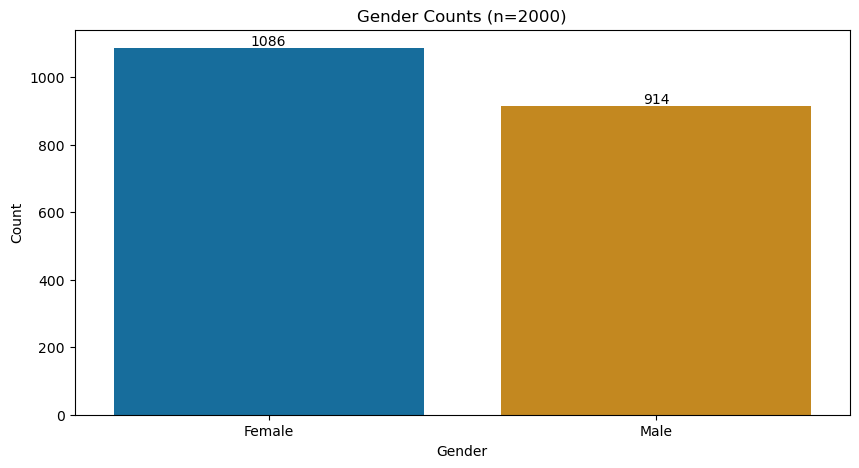

In [174]:
plot_data = df['Sex'].value_counts().reset_index()
plot_data.columns = ['Gender', 'Count']

plt.figure(figsize=(10,5)) # figure
ax = sns.barplot(data=plot_data,
                 x='Gender',
                 y='Count',
                 palette='colorblind')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}",
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom')
ax.set(title=f"Gender Counts (n={len(df)})")

In [175]:
df['Marital status'] = df['Marital status'].astype(str).str.strip().str.title() # cast to string variable
df['Marital status'].unique() # identify unique values

array(['Single', 'Non-Single (Divorced / Separated / Married / Widowed)'],
      dtype=object)

In [176]:
df['Marital status'] = df['Marital status'].astype('category') # cast as categorical variable

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_12926/3715159724.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=plot_data,


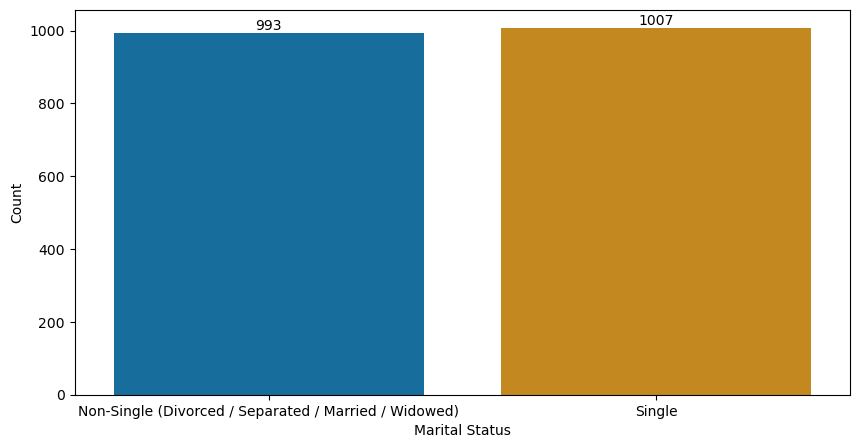

In [177]:
plot_data = df['Marital status'].value_counts().reset_index()
plot_data.columns = ['Marital Status', 'Count']
# plot data as bar
plt.figure(figsize=(10,5))
ax = sns.barplot(data=plot_data,
                 x='Marital Status',
                 y='Count',
                 palette='colorblind')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", # get label
                (p.get_x() + p.get_width() / 2., p.get_height()), # position
                ha='center', va='bottom') # alignment
plt.show()

In [178]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,Female,Single,67,university,124670,skilled employee / official,2
1,100000002,Male,Non-Single (Divorced / Separated / Married / W...,22,high school,150773,skilled employee / official,2
2,100000003,Female,Single,49,high school,89210,unemployed / unskilled,0
3,100000004,Female,Single,45,high school,171565,skilled employee / official,1
4,100000005,Female,Single,53,high school,149031,skilled employee / official,1


In [179]:
df['Age'] = df['Age'].apply(pd.to_numeric, errors='coerce')
df['Age'].describe()

count    2000.000000
mean       35.909000
std        11.719402
min        18.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        76.000000
Name: Age, dtype: float64

[Text(0.5, 1.0, 'Age Distribution KDE Plot (n=2000)')]

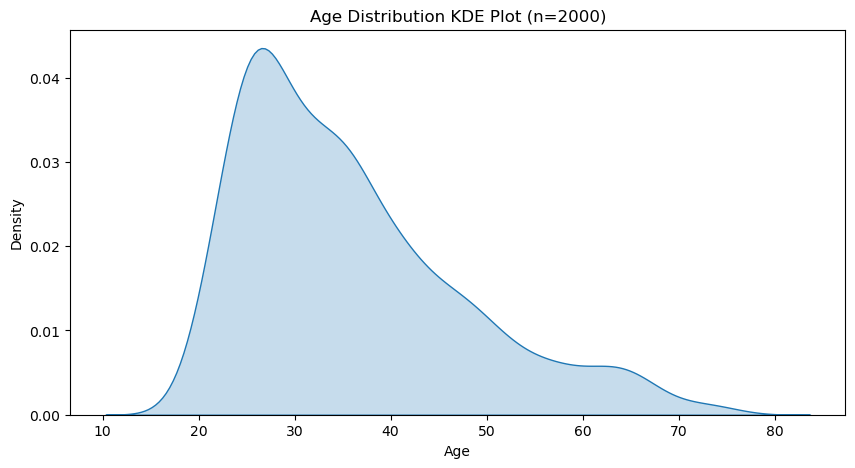

In [180]:
plot_data = df['Age']
plt.figure(figsize=(10,5))
ax = sns.kdeplot(data=plot_data, 
                 fill=True)
ax.set(title=f"Age Distribution KDE Plot (n={len(df)})")

In [181]:
df['Education'] = df['Education'].str.title() # titlise for asthetic
df['Education'].unique() # inspect unique values

array(['University', 'High School', 'Other / Unknown', 'Graduate School'],
      dtype=object)

In [182]:
plot_data = df['Education'].value_counts(normalize=True).reset_index()
plot_data.columns = ['Education Level', 'Percentage']
plot_data

,Education Level,Percentage
0,High School,0.6930
1,University,0.1455
2,Other / Unknown,0.1435
3,Graduate School,0.0180


Text(0.5, 1.0, 'Education Levels Amongst Participants (n=2000)')

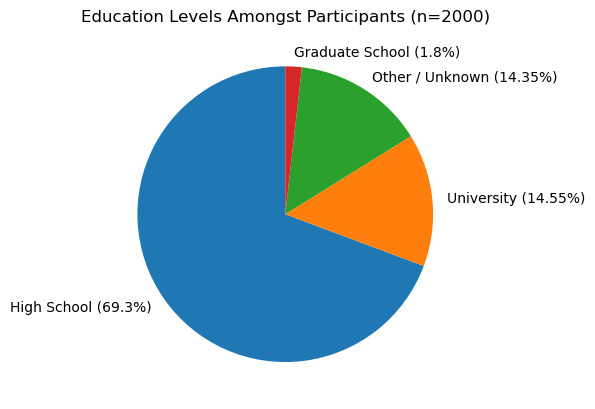

In [183]:
labels = [f"{edu} ({pct}%)" for edu, pct in zip(plot_data['Education Level'], (plot_data['Percentage'] * 100).round(2))]

plt.pie(x=plot_data['Percentage'],
        labels=labels,
        startangle=90,
        autopct=None)
plt.title(f"Education Levels Amongst Participants (n={len(df)})")

In [184]:
df['Income'].describe()

count      2000.000000
mean     120954.419000
std       38108.824679
min       35832.000000
25%       97663.250000
50%      115548.500000
75%      138072.250000
max      309364.000000
Name: Income, dtype: float64

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_12926/3651904559.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data=plot_data,


[Text(0.5, 1.0, 'Income Distrbibution Amongst Participants (n=2000)')]

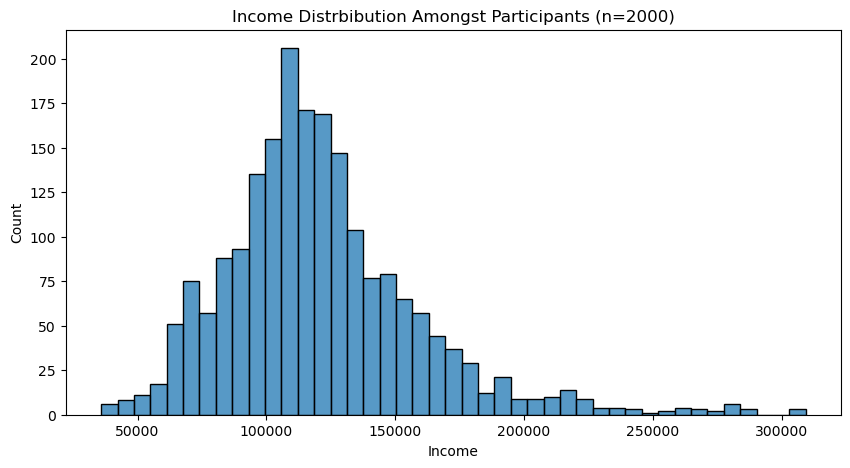

In [185]:
plot_data = df['Income']
plt.figure(figsize=(10,5))
ax = sns.histplot(data=plot_data,
                  palette='colorblind')
ax.set(title=f"Income Distrbibution Amongst Participants (n={len(df)})")

In [186]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,Female,Single,67,University,124670,skilled employee / official,2
1,100000002,Male,Non-Single (Divorced / Separated / Married / W...,22,High School,150773,skilled employee / official,2
2,100000003,Female,Single,49,High School,89210,unemployed / unskilled,0
3,100000004,Female,Single,45,High School,171565,skilled employee / official,1
4,100000005,Female,Single,53,High School,149031,skilled employee / official,1


In [187]:
df['Occupation'] = df['Occupation'].str.title() # titlise for aesthetic
df['Occupation'].unique() # show unique values in column

array(['Skilled Employee / Official', 'Unemployed / Unskilled',
       'Management / Self-Employed / Highly Qualified Employee / Officer'],
      dtype=object)

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_12926/1488116060.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=df['Occupation'],


([0, 1, 2],
 [Text(0, 0, 'Skilled Employee / Official'),
  Text(1, 0, 'Unemployed / Unskilled'),
  Text(2, 0, 'Management / Self-Employed / Highly Qualified Employee / Officer')])

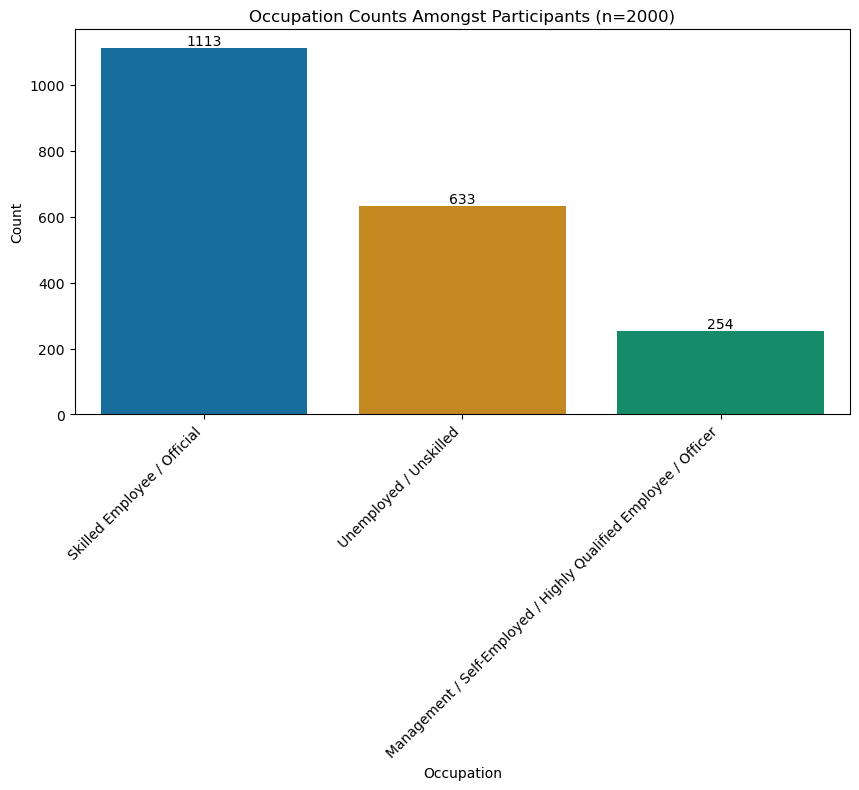

In [188]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=df['Occupation'],
                 palette='colorblind')
ax.set(title=f'Occupation Counts Amongst Participants (n={len(df)})',
       ylabel='Count')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.xticks(rotation=45,
           ha='right')

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_12926/4193250081.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=df['Settlement size'],


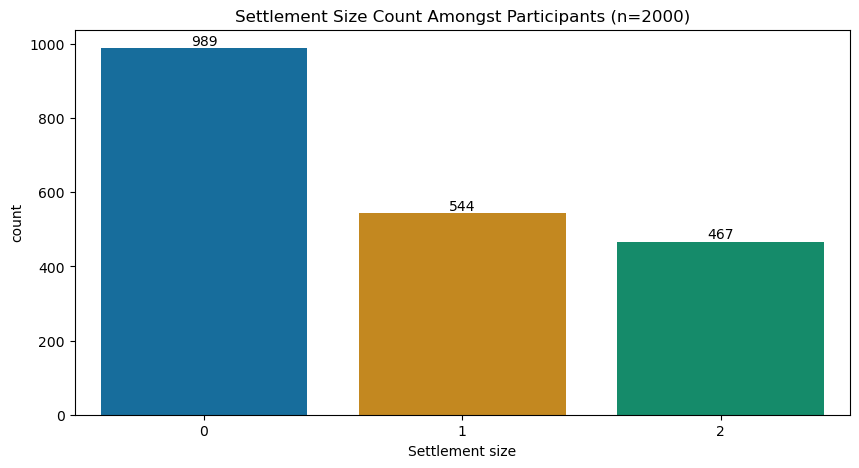

In [192]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=df['Settlement size'],
                 palette='colorblind')
ax.set(title=f'Settlement Size Count Amongst Participants (n={len(df)})')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

<Figure size 1000x500 with 0 Axes>

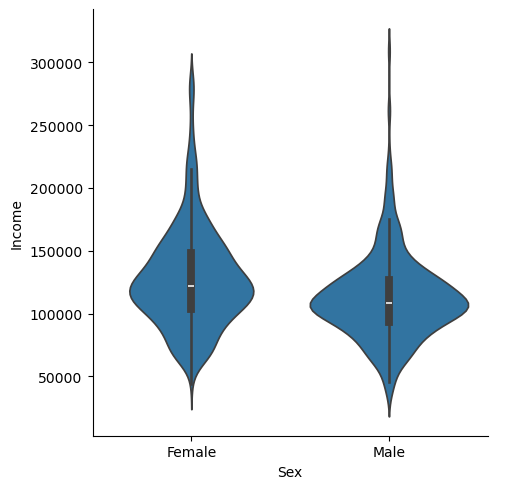

In [198]:
plt.figure(figsize=(10,5))
ax=sns.catplot(data=df,
               x='Sex',
               y='Income',
               kind='violin')